[[(0, 21, 3, 3, [[3, 10, 15], [20, 13, 13], [10, 19, 17]], [8, 3, 13])]]
Restricted license - for non-production use only - expires 2025-11-24
best_cost: 37.0
best_solution_case: [1.0, 1.0, -0.0, 1.0, 0.0, -0.0, -0.0, 1.0, 0.0, 1.0, -0.0, -0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]

n:  21
m: 9
min_prob:  0.009936100657796487 -6.6531044957888525
max_prob:  0.034489525423850864 -4.857697912334827
max_split:  9
longest_train:  [1, 6, 3, 5, 7, 2, 3, 4, 5]


/home/jiangqifan/Tools/anaconda3/envs/qt/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


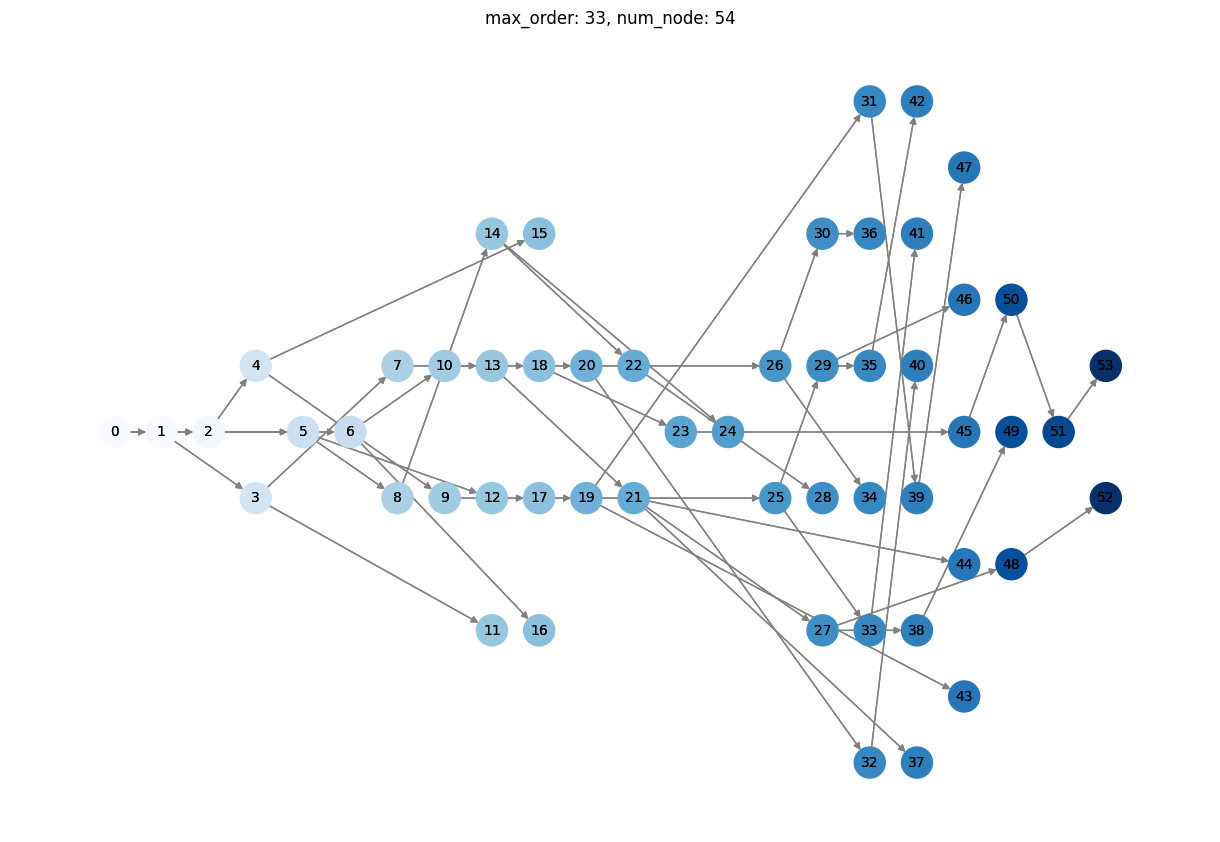

[[-1.  1.  0. -1.  1.  0. -1.  1.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1. -1.  0.  1. -1.  0.  1. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  1.  0. -1.  1.  0. -1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. -1.  0.  1. -1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]]
0 (1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) (0, None, -1)
1 (0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) (1, 0, 0)
2 (0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [1]:
should_print = True

from qt.problem.facility_location_problem import generate_flp
from qt.problem.set_cover_problem import generate_scp
from qt.problem.k_partition_problem import generate_kpp
from qt.problem.graph_coloring_problem import generate_gcp
from qt.model import LinearConstrainedBinaryOptimization as LcboModel
from qt.solver.vqa.optimizer import CobylaOptimizer, AdamOptimizer
from qt.solver.vqa import (
    HeaSolver, PenaltySolver, CyclicSolver, ChocoSolver, RasenganSolver,
)
from qt.provider import (
    AerGpuProvider, AerProvider, FakeBrisbaneProvider, FakeKyivProvider, FakeTorinoProvider, DdsimProvider,
)
from qt.solver.vqa.explorer import QtoExplorer, QtoTestExplorer
num_case = 1
a, b = generate_flp(num_case,[(3, 3)])
# a, b = generate_gcp(num_case, [(5, 2)])

# a, b = generate_kpp(num_case, [(8, 3, 4)], 1, 20)


print(b)

best_lst = []
arg_lst = []

for i in range(num_case):
    opt = CobylaOptimizer(max_iter=200)
    aer = DdsimProvider()
    a[0][i].set_penalty_lambda(400)
    explorer = QtoTestExplorer(
        prb_model=a[0][i],  # 问题模型
    )

    space_explore, dict_state, max_order, counter, max_split, longest_train = explorer.explore()
    explorer.plot_generation_relationship()
    # print(dict_state)
    print(explorer.model_option.Hd_bitstr_list)
    for i, (k, v) in enumerate(dict_state.items()):
        print(i, k, v)


In [2]:
feasible_list = list(dict_state.keys())
feasible_list

[(1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0),
 (1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0),
 (1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0),
 (1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1),
 (1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0),
 (1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0),
 (1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0),
 (1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1),
 (1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0),
 (1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0),
 (1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0),
 (1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0),
 (1, 0, 1,

In [3]:
for feasible in feasible_list:
    opt = CobylaOptimizer(max_iter=200)
    aer = DdsimProvider()
    a[0][0].set_penalty_lambda(400)
    explorer = QtoTestExplorer(
        prb_model=a[0][0],  # 问题模型
        feasible_state=[list(feasible)],
    )

    space_explore, dict_state, max_order, counter, max_split, longest_train = explorer.explore()
    print(max_order, counter)
    # explorer.plot_generation_relationship()
    # print(dict_state)
    # for i, (k, v) in enumerate(dict_state.items()):
    #     print(i, k, v)

n:  21
m: 9
min_prob:  0.009936100657796487 -6.6531044957888525
max_prob:  0.034489525423850864 -4.857697912334827
max_split:  9
longest_train:  [1, 6, 3, 5, 7, 2, 3, 4, 5]
33 54
n:  21
m: 9
min_prob:  0.009936100657796487 -6.6531044957888525
max_prob:  0.034489525423850864 -4.857697912334827
max_split:  10
longest_train:  [0, 1, 6, 3, 5, 7, 2, 3, 4, 5]
33 54
n:  21
m: 9
min_prob:  0.004542325506918132 -7.78235319015627
max_prob:  0.034699030278716236 -4.848960844885765
max_split:  9
longest_train:  [1, 8, 3, 5, 0, 6, 2, 3, 4]
33 54
n:  21
m: 9
min_prob:  0.0025259213871322572 -8.628974545045446
max_prob:  0.06021437479648739 -4.053748251427695
max_split:  11
longest_train:  [6, 0, 1, 6, 3, 5, 7, 2, 3, 4, 5]
33 54
n:  21
m: 9
min_prob:  0.0008795496833045036 -10.150947305737894
max_prob:  0.06009954569162801 -4.056502104510686
max_split:  10
longest_train:  [3, 5, 7, 2, 3, 4, 5, 6, 1, 2]
42 54
n:  21
m: 9
min_prob:  0.004077105724718422 -7.93823891636903
max_prob:  0.03784930171968881 

In [4]:
# import itertools

# import numpy as np
# a = np.array([
#     [0.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
#     [0.0, 1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
#     [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
#     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
#     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
#     [0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     [0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     [-1.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     [-1.0, 1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# ])

# ans = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

# xp = np.array([1.0 ,0.0 ,0.0 ,1.0 ,0.0, 0.0, 1.0 ,0.0 ,0.0 ,1.0 ,0.0, 0.0, 0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0, 0.0, 0.0, 0.0])
# # print("x0=", xp)
# # longest_train =  [1, 4, 6, 7, 2, 3, 4, 5, 6, 2]
# longest_train_o =  range(len(a))
# set_train = set(itertools.permutations(longest_train_o))
# for longest_train in set_train:
#     cnt = 1
#     for id in longest_train:
#         xp = xp + a[id]
#         # print("tau = ", a[id], end="")
#         ok = True
#         for x in xp:
#             if x > 1 or x < -1:
#                 ok = False

#         if not ok:
#             xp = xp - 2* a[id]
#             # print("-----", id)
#         # else:
#             # print("+++++", id)
        
#         if (xp == ans).all():
#             print(cnt)
#         # print("x" + str(cnt) + "=", xp)
#         cnt += 1




In [5]:
import numpy as np
a = np.array([
    [0.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [-1.0, 1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

ans = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

xp = np.array([1.0 ,0.0 ,0.0 ,1.0 ,0.0, 0.0, 1.0 ,0.0 ,0.0 ,1.0 ,0.0, 0.0, 0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0, 0.0, 0.0, 0.0])
# print("x0=",xp)
cnt = 1
longest_train =  [1, 4, 6, 7, 2, 3, 4, 5, 6, 2]
for id in longest_train:
    xp = xp + a[id]
    # print("tau = ", a[id], end="")
    ok = True
    for x in xp:
        if x > 1 or x < -1:
            ok = False

    if not ok:
        xp = xp - 2* a[id]
        # print("-----", id)
    # else:
        # print("+++++", id)
    print(np.sum(xp == ans))
    # print("x" + str(cnt) + "=", xp)
    cnt += 1

13
11
9
13
9
11
13
15
17
21


In [6]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([1, 5, 3, 0])

same_count = np.sum(a == b)
print(same_count)  # 输出 2（因为 1 和 3 位置相同）


2
